## Code to make Fig S4
Elena Savidge
<br>
3 Aug 2023

In [2]:
# import rasterio
# from rasterio.plot import show
import matplotlib.pyplot as plt
import cartopy
#import rioxarray as rxr
import xarray as xr
import cmocean
from pyhdf.SD import SD, SDC
import cartopy.crs as ccrs
import pandas as pd
import numpy as np
import pyproj
from pyproj import Proj, transform, CRS
# import rasterio as rio
# from rasterio.plot import show
from glob import glob
from matplotlib.collections import PatchCollection
from shapely.geometry import Point, Polygon
import geopandas as gpd
import scipy
from scipy import ndimage
from cartopy.geodesic import Geodesic
import datetime

/opt/anaconda3/envs/polyarea/lib/python3.11/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [3]:
# NOTE: need dir to be set up this way for pyproj to work
pyproj.datadir.set_data_dir('/opt/anaconda3/envs/sealenv/share/proj') 

/opt/anaconda3/envs/polyarea/lib/python3.11/site-packages/pyproj/datadir.py:38: UserWarning: pyproj unable to set database path.
  _global_context_set_data_dir()


In [4]:
pwd

'/Users/elenasavidge/Documents/Documents - Elena’s MacBook Pro/PhD_Ch2/manuscriptcode_2'

## Read in data

In [5]:
# effective pixel
ther_pixel = pd.read_pickle('thermal_area_effectivepixel.pkl')
vis_pixel = pd.read_pickle('visible_area_effectivepixel') 

To get polynya area from nominal pixel dimension, need to rerun the 'thermal_area_effectivepixel' and 'visible_area_effectivepixel', but with one line of code difference in the function 3 in each notebook:
<br><br>
pixelarea = pixelwidth*pixelheight; # in km2 (effective pixel)
<br><br>
becomes
<br><br>
pixelarea = 0.250 * 0.250; # in km2 for visible, and
<br><br>
pixelarea = 1 * 1; # in km2 for thermal
<br><br>
^ a function with these modifications is currently commented out in the notebooks. To run, just uncomment this one, and comment the original function 3 where areas are calculated.

In [12]:
pwd

'/Users/elenasavidge/Documents/Documents - Elena’s MacBook Pro/PhD_Ch2/manuscriptcode_2'

In [16]:
# similarly to above, now read in files from nominal area pixel calculation (from where they are saved)

# this is just where mine are saved
# this file is saved in 'polynya_error_vis'
vis = pd.read_pickle('../polynyatimeseries/vis_df_22june_fixeddates.pkl')
# this files is saved in 'thermal_polynya_error'
ther = pd.read_pickle('../thermalpoints_error.pkl')

# Plot

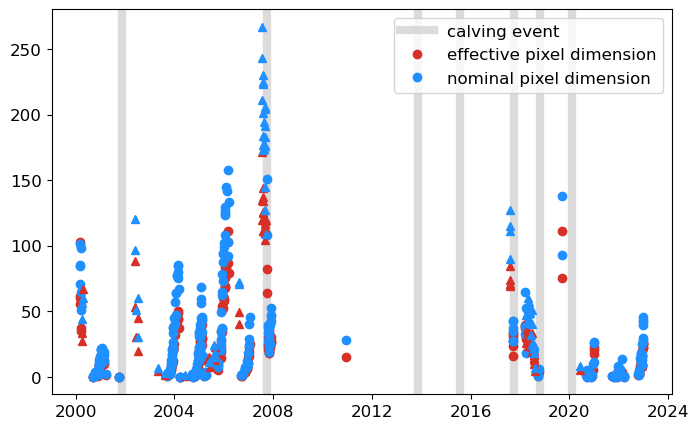

In [18]:
plt.figure(figsize=(8,5))

# difftotal = np.abs(visther_old['total']-visther_pixel['total'])

# plt.plot(visther_pixel['Date'],visther_pixel['total'], 'o',label='effective pixel dimension',c='#d73027',linewidth= 1, markersize = 6)

# plt.plot(visther_old['Date'],visther_old['total'], 'o',label='nominal pixel dimension',c='dodgerblue',linewidth= 1, markersize = 6)


#difftotal_vis = np.abs(vis['total']-vis_pixel['total'])
plt.axvline(datetime.datetime(2001, 11, 11),c='lightgrey',alpha=0.8,linewidth=6, label = 'calving event')
plt.axvline(datetime.datetime(2007, 9, 29),c='lightgrey',alpha=0.8,linewidth=6)
plt.axvline(datetime.datetime(2013, 11, 11),c='lightgrey',alpha=0.8,linewidth=6)
plt.axvline(datetime.datetime(2015, 7, 25),c='lightgrey',alpha=0.8,linewidth=6)
plt.axvline(datetime.datetime(2017, 10, 1),c='lightgrey',alpha=0.8,linewidth=6)
plt.axvline(datetime.datetime(2018, 10, 28),c='lightgrey',alpha=0.8,linewidth=6)
plt.axvline(datetime.datetime(2020, 2, 10),c='lightgrey',alpha=0.8,linewidth=6)

plt.plot(vis_pixel['Date'],vis_pixel['total'], 'o',label='effective pixel dimension',c='#d73027',linewidth= 1, markersize = 6)
plt.plot(vis['Date'],vis['total'], 'o',label='nominal pixel dimension',c='dodgerblue',linewidth= 1, markersize = 6)

plt.plot(ther_pixel['Date'],ther_pixel['total'], '^',c='#d73027',linewidth= 1, markersize = 6)
plt.plot(ther['Date'],ther['total'], '^',c='dodgerblue',linewidth= 1, markersize = 6)


plt.legend(fontsize=12)
plt.xticks(fontsize=12);plt.yticks(fontsize=12)

plt.show()
#plt.savefig('pixel_diffs.png', format='png', dpi=400)

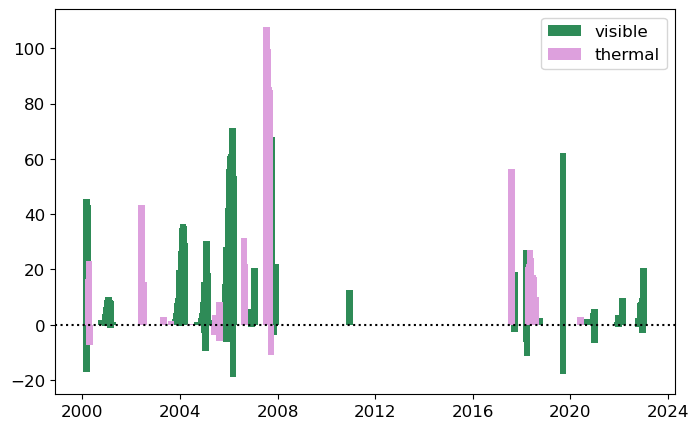

In [19]:
plt.figure(figsize=(8,5))

#difftotal = 100*np.abs((vis['total']-vis_pixel['total'])/((vis['total']+vis_pixel['total'])/2))
#difftotal = np.abs(vis['total']-vis_pixel['total'])
#plt.plot(vis_pixel['Date'],difftotal, ':o',label='total',c='#d73027',linewidth= 1, markersize = 6)

# # total
# difftotal = np.abs(visther_old['total']-visther_pixel['total'])
# plt.bar(visther_old['Date'],difftotal.dropna(),width=100,color='#d73027')

# vis
difftotal_vis = vis['total']-vis_pixel['total']
plt.bar(vis['Date'],difftotal_vis.dropna(),width=100,color='seagreen',label='visible')

# ther
difftotal_ther = ther['total']-ther_pixel['total']
plt.bar(ther['Date'],difftotal_ther.dropna(),width=100,color='plum',label='thermal')


plt.axhline(y = 0, color = 'k', linestyle = ':')
plt.legend(fontsize=12)
plt.xticks(fontsize=12);plt.yticks(fontsize=12)
plt.show()

#plt.savefig('pixel_diffs_bar.png', format='png', dpi=400)

# Save panels and make fig in ppt

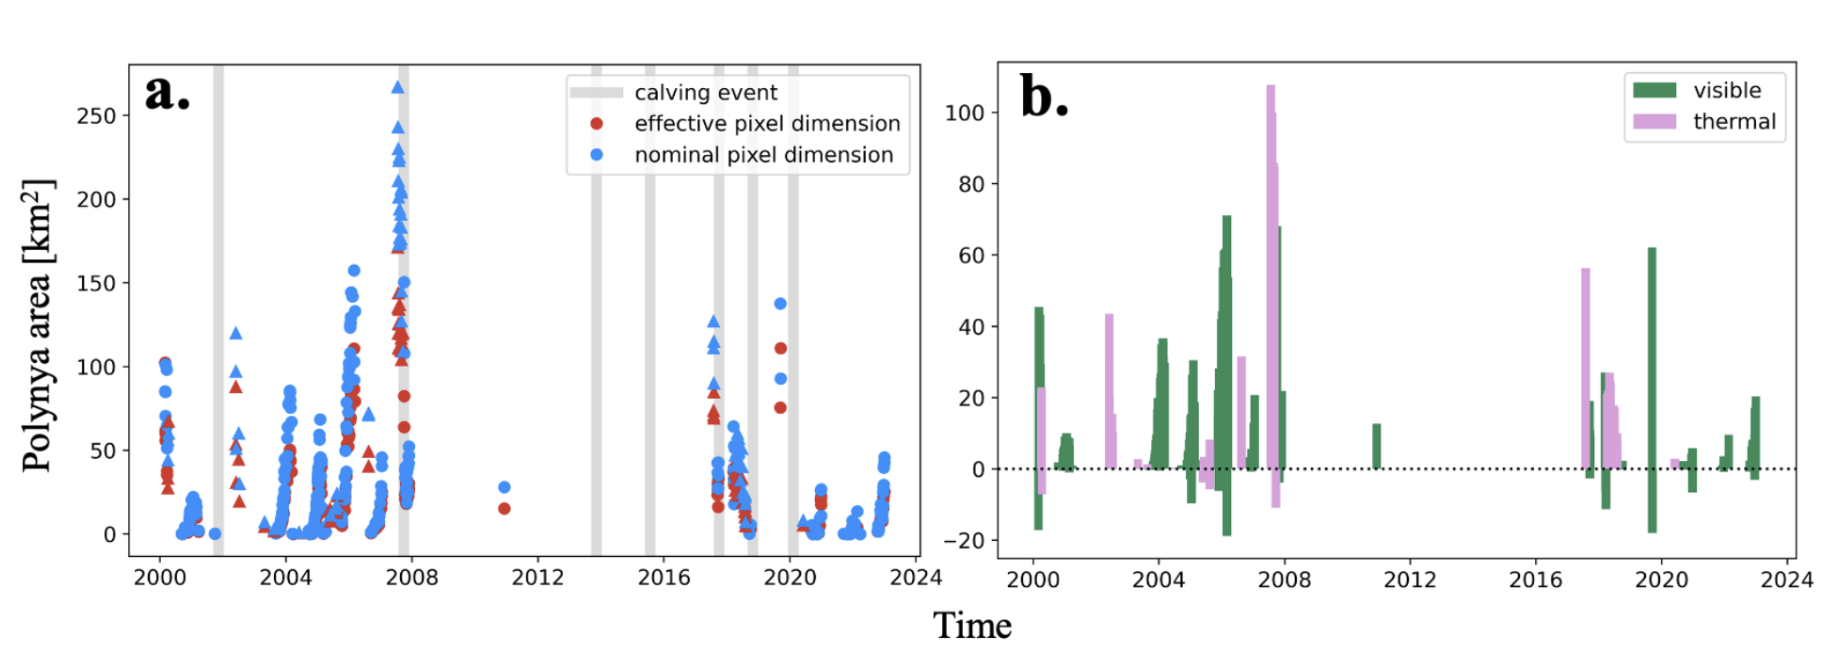